In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 64
p = 7
max_MOOD_iters = 100

sim1 = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=1, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=p,
    MOOD=True,
    cascade="first-order",
    max_MOOD_iters=max_MOOD_iters,
    NAD=True,
    # ZS=True,
    # GL=True,
    PAD={"rho": (0.0, 1.0)},
    PAD_atol=1e-14,
)

In [3]:
sim1.run(1.0, q_max=2, log_freq=10)

Step #161 @ t=1.00e+00 | dt=2.66e-15 | (done)                                                       


In [4]:
print(
    f"sim1, min rho: {np.min(sim1.minisnapshots['min_rho'])}, "
    f"max rho: {np.max(sim1.minisnapshots['max_rho'])}"
)

sim1, min rho: -7.325930190299213e-15, max rho: 1.0000000000000004


/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(


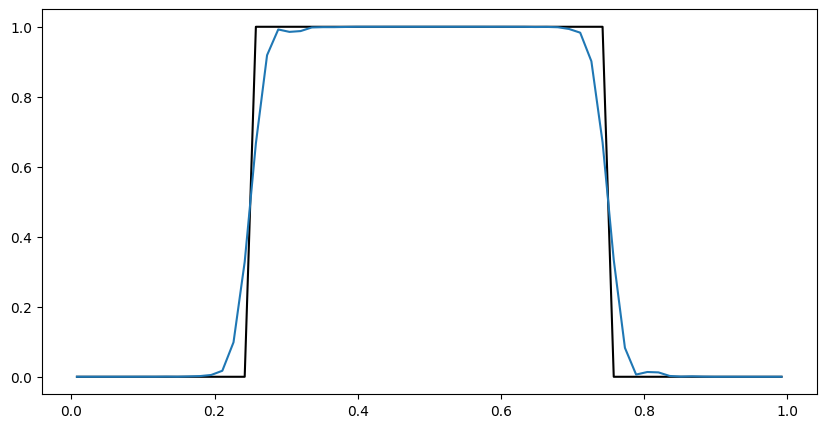

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim1, ax, "rho", cell_averaged=True, y=0.5, t=0, color="k")
vis.plot_1d_slice(
    sim1, ax, "rho", cell_averaged=True, y=0.5, xlabel=False, label="first-order"
)

In [10]:
sim1.print_timings(total_time_spec=".1f")

Routine                      # of calls  Total time (s) % time
---------------------------  ----------  --------------  ------
wall                                  1             8.6   100.0
take_step                           161             8.5    99.5
compute_dt                          161             0.0     0.2
apply_bc                           6698             0.5     6.3
riemann_solver                     1926             0.4     4.4
zhang_shu_limiter                     0               -       -
MOOD_loop                           483             4.6    53.2
      detect_troubled_cells        1876             2.5    29.6
      revise_fluxes                1393             2.0    23.4
snapshot                              2             0.0       -
minisnapshot                        162             0.0       -
